In [1]:
import re
import operator

import matplotlib.pyplot as plt
import pandas as pd

from visualization_methods import VisualizationMethods as vm
from aggregation_methods import AggregationMethods as am
import data_methods as dm

sample_size = 224
seed = 42

df = dm.get_valid_dataframe()
sample_df = df.sample(n=sample_size, random_state=seed)

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
pd.set_option("display.expand_frame_repr", False)

sample_df[['repo_id', 'dp_repo_url', 'repo_stars', 'dp_grids']].sort_values(by=['repo_stars'], ascending=False)

,repo_id,dp_repo_url,repo_stars,dp_grids
2713,encode/django-rest-framework,https://github.com/encode/django-rest-framework,23270.0,NaN
1084,jazzband/django-debug-toolbar,https://github.com/jazzband/django-debug-toolbar,6985.0,"this-site,developer-tools,data-tools"
947,adamchainz/django-cors-headers,https://github.com/adamchainz/django-cors-headers,4546.0,rest
3258,django-tastypie/django-tastypie,https://github.com/django-tastypie/django-tastypie,3785.0,"api,rest,tastypie"
1788,geex-arts/django-jet,https://github.com/geex-arts/django-jet,3266.0,"admin-interface,admin-styling"
...,...,...,...,...
3776,garyburgmann/drf-firebase-auth,https://github.com/garyburgmann/drf-firebase-auth,107.0,NaN
4034,zain/jogging,https://github.com/zain/jogging,105.0,developer-tools
681,chronossc/django-breadcrumbs,https://github.com/chronossc/django-breadcrumbs,104.0,navigation
1532,spapas/django-generic-scaffold,https://github.com/spapas/django-generic-scaffold,102.0,"bootstraps,site-frameworks,scaffolding"


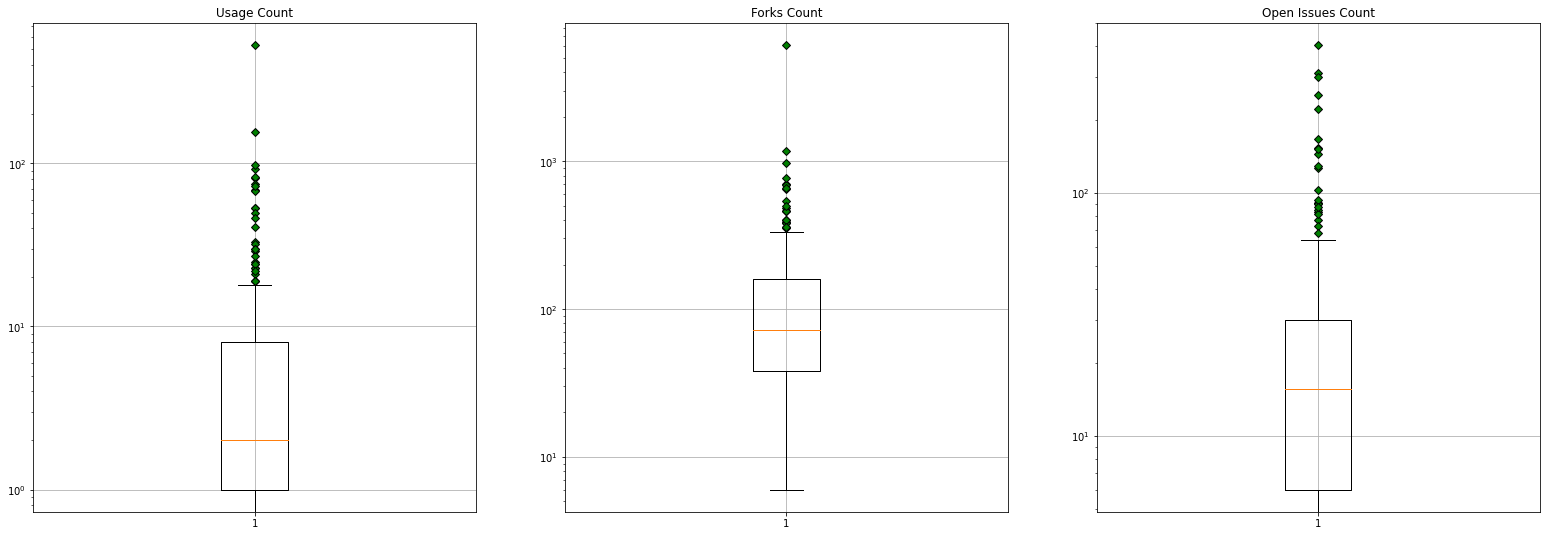

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 9))

vm.set_boxplot_by_ax(ax1, sample_df['dp_usage_count'].values, 'Usage Count', True)
vm.set_boxplot_by_ax(ax2, sample_df['repo_forks'].values, 'Forks Count', True)
vm.set_boxplot_by_ax(ax3, sample_df['repo_open_issues'].values, 'Open Issues Count', True)

plt.show()

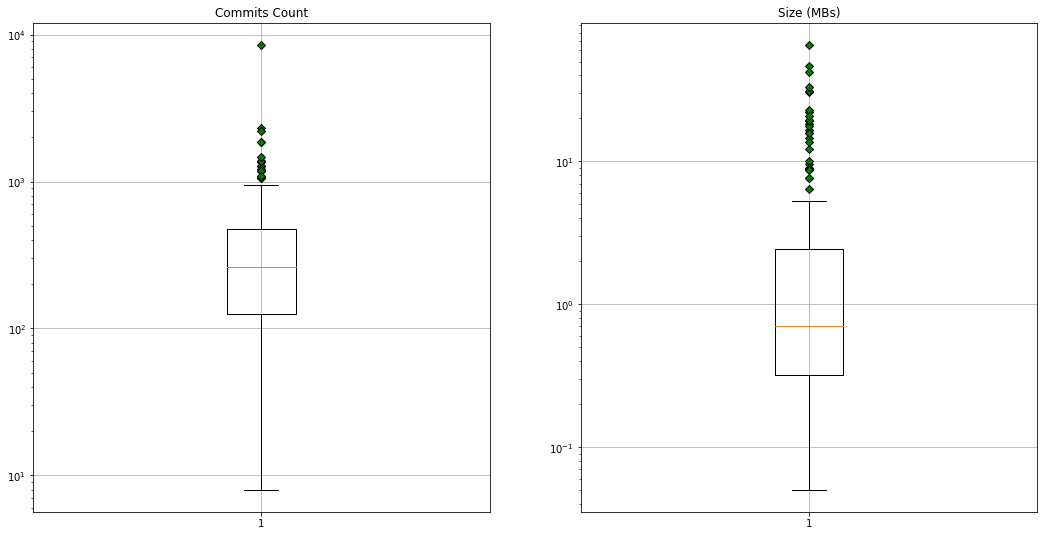

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

size_bytes = sample_df['repo_size'].values
size_kbytes = [b/1000 for b in size_bytes]
size_mbytes = [b/1000 for b in size_kbytes]

vm.set_boxplot_by_ax(ax1, sample_df['repo_commits'].values, 'Commits Count', True)
vm.set_boxplot_by_ax(ax2, size_mbytes, 'Size (MBs)', True)

plt.show()

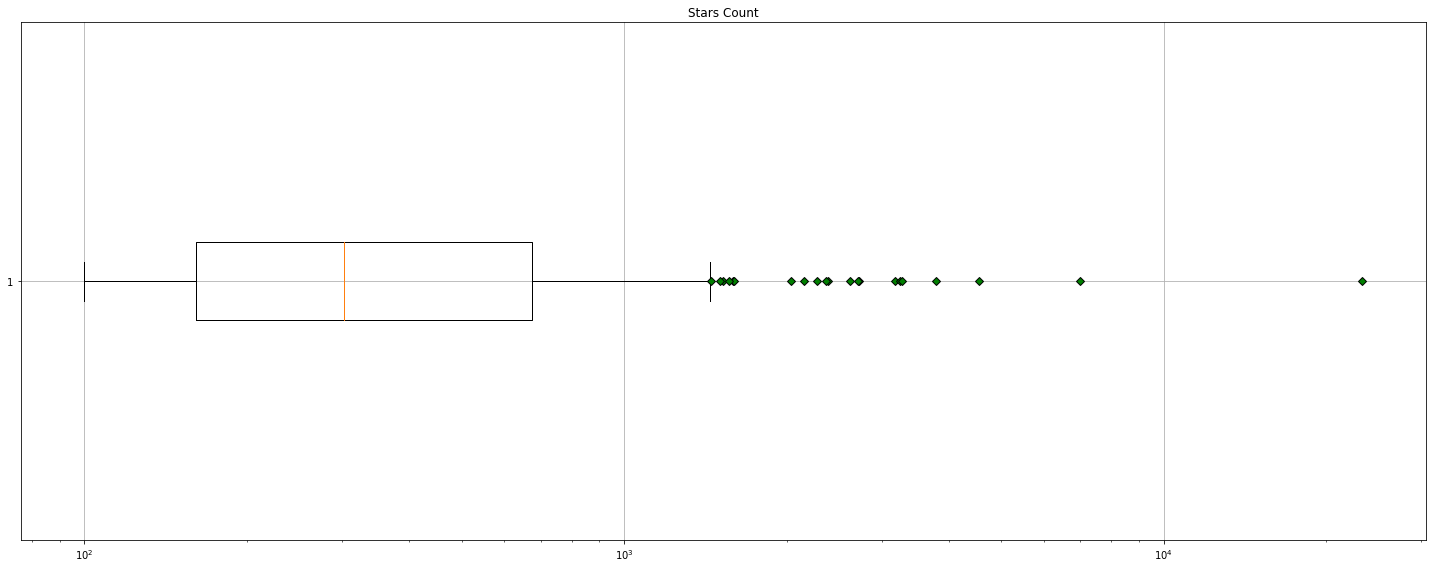

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))

vm.set_boxplot_by_ax(ax, sample_df['repo_stars'].values, 'Stars Count', True, True)

plt.tight_layout()
plt.show()

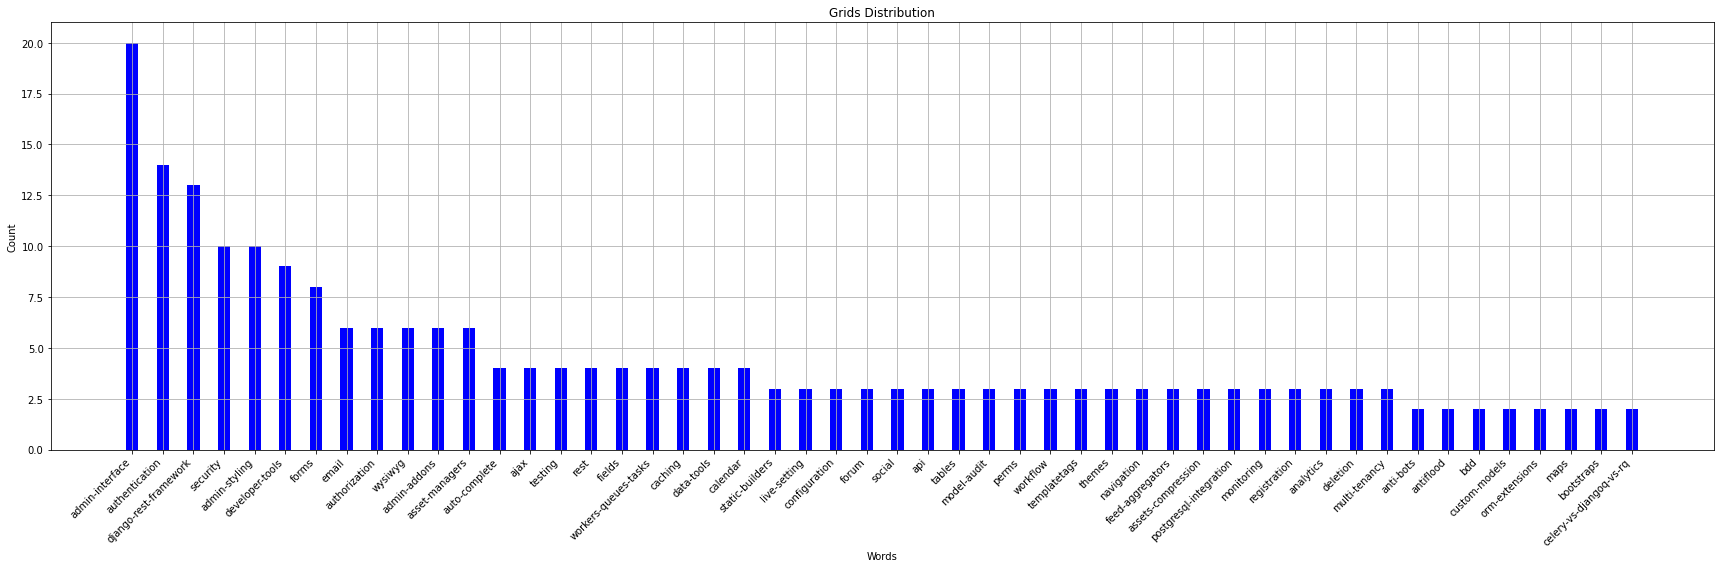

In [6]:
top = 50
_, grids_freq = am.get_concate_and_freq(sample_df[~sample_df['dp_grids'].isnull()]['dp_grids'].values)
top_grid_freq = {k[0]: k[1] for k in sorted(grids_freq.items(), key=operator.itemgetter(1), reverse=True)[:top]}

vm.show_bar_chart_by_dict(top_grid_freq, 'Words', 'Count', 'Grids Distribution', 'blue')

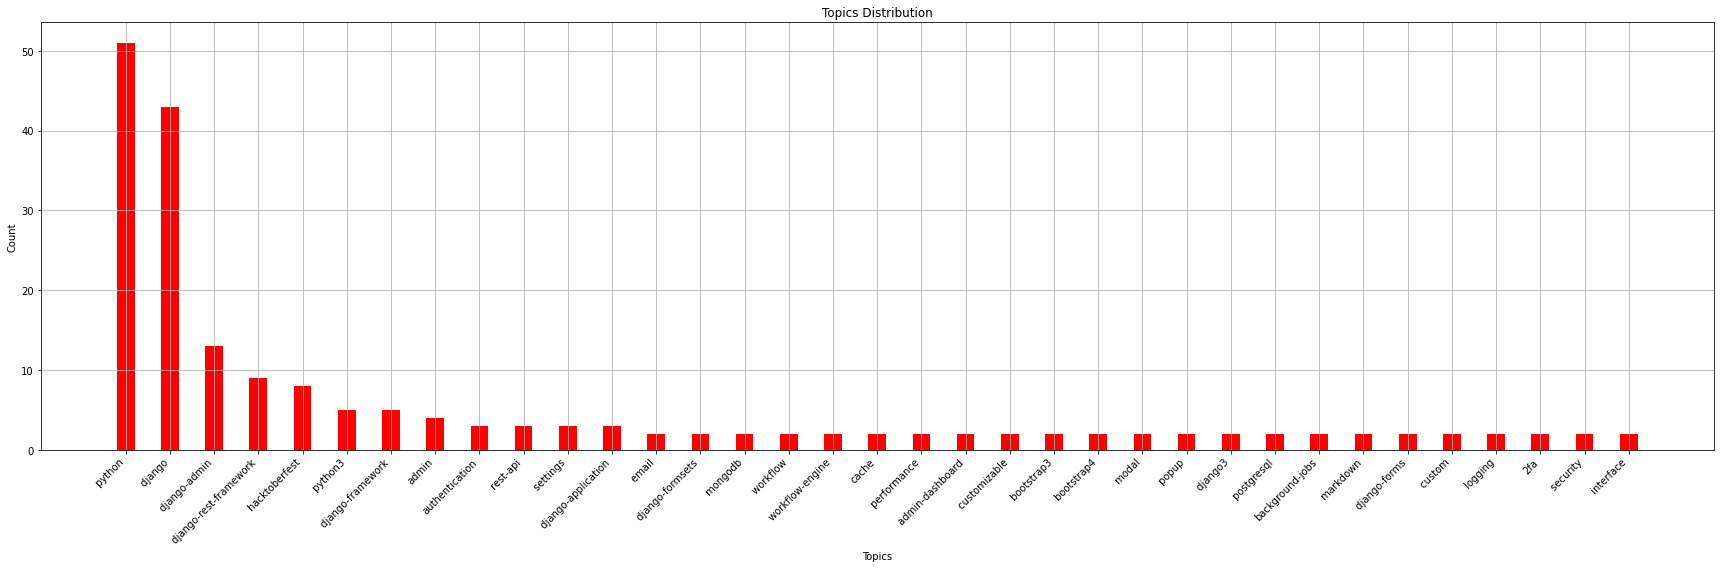

In [7]:
top = 35

unwanted_topics = [ 'django' ]
unwanted_regex = [ 
    re.compile(r'^(python)((\d+)|(\-.*)|\Z)', re.IGNORECASE), 
    re.compile(r'^(hacktoberfest)((\-\d+)|(\d+)|\Z)', re.IGNORECASE)
]

_, topics_freq = am.get_concate_and_freq(
    sample_df[~sample_df['repo_topics'].isnull()]['repo_topics'].values, 
    unwanted_topics, 
    unwanted_regex
)
top_repo_freq = {k[0]: k[1] for k in sorted(topics_freq.items(), key=operator.itemgetter(1), reverse=True)[:top]}

vm.show_bar_chart_by_dict(top_repo_freq, 'Topics', 'Count', 'Topics Distribution', 'red')

In [8]:
sheet_sample = 'repo_id;repo_url;repo_stars;repo_grids'
for index, row in sample_df.sort_values(by=['repo_stars'], ascending=False).iterrows():
    sheet_sample = '{}\n{};{};{};{}'.format(sheet_sample, row['repo_id'], row['dp_repo_url'], row['repo_stars'], row['dp_grids'])
print(sheet_sample)

repo_id;repo_url;repo_stars;repo_grids
encode/django-rest-framework;https://github.com/encode/django-rest-framework;23270.0;nan
jazzband/django-debug-toolbar;https://github.com/jazzband/django-debug-toolbar;6985.0;this-site,developer-tools,data-tools
adamchainz/django-cors-headers;https://github.com/adamchainz/django-cors-headers;4546.0;rest
django-tastypie/django-tastypie;https://github.com/django-tastypie/django-tastypie;3785.0;api,rest,tastypie
geex-arts/django-jet;https://github.com/geex-arts/django-jet;3266.0;admin-interface,admin-styling
sehmaschine/django-grappelli;https://github.com/sehmaschine/django-grappelli;3249.0;admin-interface,admin-styling
django-guardian/django-guardian;https://github.com/django-guardian/django-guardian;3174.0;security,perms,authorization
etianen/django-reversion;https://github.com/etianen/django-reversion;2730.0;versioning,this-site,model-audit,deletion
axnsan12/drf-yasg;https://github.com/axnsan12/drf-yasg;2717.0;django-rest-framework,api,developer-t